# Support Vector Machine

## SVM can be used as a classification model for linear datasets and also for non-linear datasets

## Example 1

## SVM Model on Linear seperable dataset

In [25]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [26]:
x,y = make_blobs(n_samples=500,n_features=2,centers=2,cluster_std=2.5,random_state=1)

In [27]:
x.shape

(500, 2)

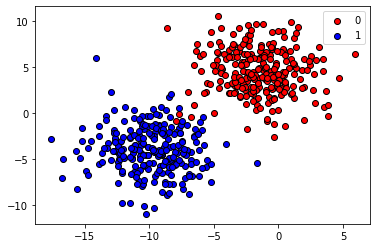

In [28]:
plt.scatter(x[y==0,0],x[y==0,1],c='red',label='0',edgecolors='k')
plt.scatter(x[y==1,0],x[y==1,1],c='blue',label='1',edgecolors='k')
plt.legend()
plt.show()

### Applying SVM model

In [29]:
from sklearn.svm import SVC

In [30]:
#gamma=.01,10
clf = SVC(kernel='rbf',gamma=10)  #model assumes that data is non-linear separable
#clf = SVC(kernel='linear')   #model assumes that data is linear separable

In [31]:
clf.fit(x,y)
score = clf.score(x,y)
score

1.0

In [32]:
pred = clf.predict(x)
np.where(pred!=y)

(array([], dtype=int64),)

### Testing SVM model

In [33]:
test = [-6,0.5]

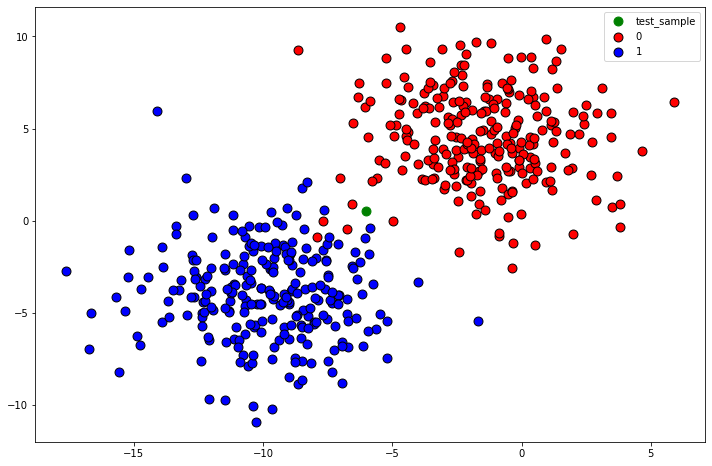

In [34]:
plt.figure(figsize=(12,8))
plt.scatter(test[0],test[1],c='green',label='test_sample',s=80)

plt.scatter(x[y==0,0],x[y==0,1],c='red',label='0',edgecolors='k',s=80)
plt.scatter(x[y==1,0],x[y==1,1],c='blue',label='1',edgecolors='k',s=80)
plt.legend()
plt.show()

In [35]:
clf.predict([test])

array([0])

## SVM model on Non-linear seperable dataset

In [36]:
from sklearn.datasets import make_circles
#to avoid future warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [37]:
x1,y1 = make_circles(n_samples=100,random_state=10,noise=.05)

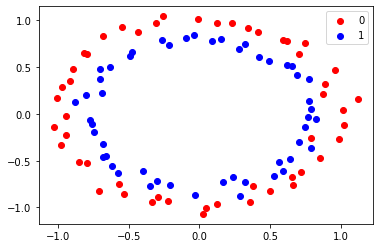

In [38]:
plt.scatter(x1[y1==0,0],x1[y1==0,1],c='red',label='0')
plt.scatter(x1[y1==1,0],x1[y1==1,1],c='blue',label='1')
plt.legend()
plt.show()

In [39]:
# RBF is used to work with non linear dataset

# Gamma is used when we use the RBF kernel. if we use linear kernel then we do not need gamma only we need C hypermeter.

# Gamma is a hyperparameter which we have to set before training model. Gamma decides the the region of a class

# if gamma is low then decision region of a class will be large

# if gamma is high then decision region of a class will be small

In [40]:
clf=SVC(kernel='rbf',gamma=10)

In [41]:
clf.fit(x1,y1)

SVC(gamma=10)

In [42]:
clf.score(x1,y1)

0.97

## When we have large amount of samples and features then how to select kernel value?

## SVM with Hyper parameter tuning

In [43]:
from sklearn.datasets import load_digits

In [44]:
d = load_digits()

In [45]:
X = d.data
y = d.target

## splitting data

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.2,random_state=12)

In [48]:
clf = SVC(kernel='rbf',gamma=10)

In [49]:
clf.fit(xtrain,ytrain)

SVC(gamma=10)

In [50]:
clf.score(xtrain,ytrain)

1.0

In [51]:
clf.score(xtest,ytest)

0.08055555555555556

### large value of gamma leads to overfitting in the above example

## SVM with hyper parameter tuning example

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
p = [{'kernel':['linear'],'C':[.01,1,10]},{'kernel':['rbf'],'gamma':[.001,.01,.1,10]}]

In [54]:
clf = GridSearchCV(SVC(),param_grid=p,cv=5,scoring='accuracy')

In [55]:
clf.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.01, 1, 10], 'kernel': ['linear']},
                         {'gamma': [0.001, 0.01, 0.1, 10], 'kernel': ['rbf']}],
             scoring='accuracy')

In [56]:
clf.best_score_ #getting the best model with the highest score

0.9916448896631824

In [57]:
clf.best_params_ # getting the best model with the best hyper parameters with the highest score

{'gamma': 0.001, 'kernel': 'rbf'}

In [58]:
clf1 = clf.best_estimator_ # saving the model with the best hyper parameter in the clf variable

In [59]:
pred = clf1.predict(xtest)

In [60]:
pred

array([2, 8, 7, 0, 2, 1, 8, 8, 9, 1, 5, 9, 2, 2, 1, 2, 0, 7, 7, 2, 4, 4,
       4, 7, 2, 7, 3, 6, 7, 4, 2, 3, 1, 5, 7, 0, 9, 2, 7, 2, 9, 8, 6, 5,
       1, 3, 1, 7, 1, 3, 3, 2, 3, 7, 7, 7, 2, 9, 4, 7, 4, 6, 9, 3, 0, 6,
       8, 3, 6, 0, 9, 7, 2, 0, 1, 2, 3, 3, 0, 9, 8, 1, 5, 8, 9, 4, 5, 6,
       0, 0, 3, 1, 3, 2, 4, 4, 7, 5, 6, 4, 8, 6, 4, 5, 1, 1, 4, 6, 9, 7,
       1, 5, 0, 2, 3, 5, 2, 8, 1, 7, 5, 9, 9, 7, 6, 4, 7, 3, 2, 2, 3, 0,
       0, 4, 0, 0, 5, 8, 5, 6, 4, 8, 6, 0, 7, 7, 4, 9, 4, 2, 3, 6, 7, 5,
       9, 3, 6, 9, 6, 3, 4, 9, 6, 6, 0, 3, 6, 7, 9, 8, 8, 1, 5, 0, 4, 9,
       3, 4, 0, 5, 3, 0, 5, 3, 8, 4, 3, 3, 5, 4, 1, 4, 4, 3, 7, 8, 8, 1,
       7, 8, 5, 0, 5, 3, 7, 0, 4, 1, 3, 1, 9, 5, 9, 4, 1, 3, 0, 9, 2, 0,
       3, 8, 8, 0, 6, 3, 1, 9, 3, 8, 7, 7, 1, 3, 3, 7, 0, 6, 5, 6, 1, 9,
       9, 8, 4, 5, 2, 3, 0, 9, 0, 3, 2, 7, 7, 8, 0, 4, 6, 5, 6, 5, 0, 4,
       2, 4, 6, 0, 3, 0, 6, 3, 8, 3, 7, 2, 6, 1, 4, 1, 7, 6, 4, 2, 7, 3,
       8, 6, 9, 7, 1, 5, 8, 0, 9, 7, 7, 1, 3, 3, 2,

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
accuracy_score(ytest,pred)

0.9944444444444445

In [63]:
np.where(pred!=ytest) #getting all the missclassified numbers 

(array([161, 212]),)

## Using SVM for classification 

### Here we are going to use SVM to classify numbers in the data set in form of 28x28 images

In [177]:
## use SVM for number of samples when it is low

In [178]:
from sklearn.datasets import fetch_openml
import numpy as np

## downloading mnsit dataset from open_ml website

In [179]:
mnist = fetch_openml('mnist_784') # it is a dataset that contains images of numbers from 0 to 9

## x and y comes in the form of dataframe hence use .values to convert them into arrays

In [180]:
x = mnist.data.values

In [181]:
y = mnist.target.values

In [182]:
x.shape

(70000, 784)

In [183]:
x.ndim

2

In [184]:
y.shape

(70000,)

In [185]:
y.ndim

1

In [186]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

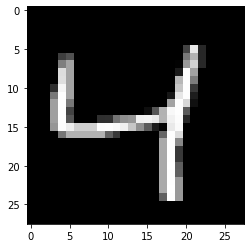

In [187]:
plt.imshow(x[2].reshape(28,28),cmap='gray')
plt.show()

In [188]:
np.unique(y,return_counts=True)

(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958]))

## use minmax scalar here for feature scaling

In [189]:
from sklearn.preprocessing import MinMaxScaler 

In [190]:
minmax_scaler = MinMaxScaler() # initialization of minmaxScalar

## Splitting data

In [191]:
from sklearn.model_selection import train_test_split

In [192]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2,random_state=12)

In [193]:
xtrain.shape

(56000, 784)

In [194]:
xtest.shape

(14000, 784)

## Transforming data using Feature Scaling (MinMaxScaler) OR Normalizing data using MinMax Scalar. It is very important to normalize data in the dataframe before feeding it to SVM

In [195]:
minmax_scaler_train = minmax_scaler.fit_transform(xtrain)
minmax_scaler_test = minmax_scaler.transform(xtest)

In [196]:
minmax_scaler_train.shape

(56000, 784)

In [197]:
minmax_scaler_test.shape

(14000, 784)

## Use PCA ->It reduces dimension or Features with the minimum loss of information to reduce model training time and remove less important features in the dataset

In [198]:
from sklearn.decomposition import PCA

In [199]:
pca = PCA(n_components=.95)

In [200]:
pca_train = pca.fit_transform(minmax_scaler_train)
pca_test = pca.transform(minmax_scaler_test)

In [201]:
pca_train.shape

(56000, 154)

In [202]:
pca_test.shape

(14000, 154)

### Save the PCA used in the HDD using pickle

In [203]:
#pickle.dump(model_name, open(filename, 'wb')) ->wb = write binary

In [205]:
filename = 'PCA.sav'
pickle.dump(pca, open(filename, 'wb'))

## Now applying SVM

In [206]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [207]:
#p = [{'kernel':['linear'],'C':[.01,1,10]},{'kernel':['rbf'],'gamma':[.001,.01,.1,10]}]

In [208]:
#clf = GridSearchCV(SVC(),param_grid=p,cv=5,scoring='accuracy')

In [209]:
#gamma=.01,10
clf = SVC(kernel='rbf',gamma=0.001)  #model assumes that data is non-linear separable
#clf = SVC(kernel='linear')   #model assumes that data is linear separable

In [210]:
clf.fit(pca_train,ytrain) # training SVC model

SVC(gamma=0.001)

In [211]:
score = clf.score(pca_test,ytest)
score

0.9366428571428571

In [212]:
pred = clf.predict(pca_test)
pred

array(['3', '7', '1', ..., '5', '7', '4'], dtype=object)

In [213]:
np.where(pred!=ytest) #getting all the missclassified numbers 

(array([    5,     8,     9,    15,    39,    49,    56,    90,   117,
          125,   130,   137,   150,   187,   190,   212,   213,   225,
          281,   334,   336,   345,   355,   362,   367,   416,   417,
          428,   465,   468,   471,   472,   489,   499,   523,   537,
          557,   601,   614,   630,   633,   648,   688,   718,   719,
          725,   752,   764,   768,   782,   793,   802,   842,   853,
          874,   878,   917,   958,   995,  1011,  1015,  1022,  1086,
         1120,  1126,  1130,  1134,  1141,  1158,  1186,  1219,  1237,
         1251,  1253,  1259,  1283,  1296,  1338,  1340,  1360,  1374,
         1408,  1417,  1427,  1443,  1461,  1488,  1507,  1509,  1520,
         1545,  1599,  1608,  1610,  1645,  1678,  1690,  1711,  1714,
         1743,  1769,  1772,  1793,  1796,  1798,  1802,  1848,  1857,
         1881,  1891,  1896,  1899,  1901,  1902,  1904,  1932,  1991,
         2025,  2040,  2047,  2093,  2100,  2115,  2130,  2132,  2161,
      

## save the model to disk

In [214]:
#pickle.dump(model_name, open(filename, 'wb')) ->wb = write binary

In [215]:
import pickle

In [216]:
filename = 'digit_recognizer_svm.sav'
pickle.dump(clf, open(filename, 'wb'))

## Read the saved PCA from HDD

In [237]:
# load the PCA from disk
filename = 'PCA.sav'
pca = pickle.load(open(filename, 'rb')) # -> rb = read binary

## Read the saved model from the disk

In [238]:
# load the model from disk
filename = 'digit_recognizer_svm.sav'
loaded_model = pickle.load(open(filename, 'rb')) # -> rb = read binary

### Test the loaded model on test dataset

In [239]:
result = loaded_model.score(pca_test,ytest)
result

0.9366428571428571

In [240]:
loaded_model.predict(pca_test)

array(['3', '7', '1', ..., '5', '7', '4'], dtype=object)

In [241]:
ytest

['3', '7', '1', '9', '1', ..., '6', '1', '5', '7', '2']
Length: 14000
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

## Importing image in this jupyter notebook using OpenCv

In [242]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## When you use opencv to import an image the image is plready in numpy nD array format and is ready to be used

In [349]:
# importing image
image = cv2.imread('/home/Machine_learning/github/Machine_Learning/Prutor_ML_ClassWork/numbers/9.jpeg')

In [350]:
image.ndim #here image imported via opencv is in 3D numpy array  

3

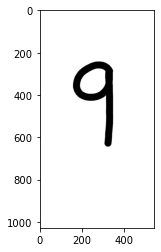

In [351]:
plt.imshow(image)

## Because we trained our model using numbers of color white with a black background we need to invert the color of our image

In [352]:
image1 = np.invert(image) #inverting color using numpy

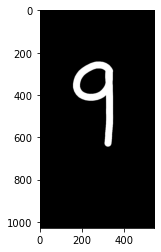

In [353]:
plt.imshow(image1)

## converting image into a gray scale image

In [354]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [355]:
gray.ndim #it will convert 3D array of image into 2D array of image 

2

## We trained our model using 28 x 28 size images so we need to resize our imported image in 28 x 28 size

In [356]:
resized_img = cv2.resize(gray,(28,28)) #resize image into 28 x 28

In [357]:
resized_img.shape

(28, 28)

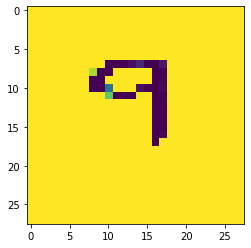

In [358]:
plt.imshow(resized_img)

## Feature scaling using Minmax Scalar

### our pickeled model only accepts 784 features so we need to reshape our image_array into (1,784) shape

In [359]:
reshaped_image = resized_img.reshape(1,784) 

In [360]:
minmax_scaler_image = minmax_scaler.transform(reshaped_image) #feature scaling using minmaxscalar

In [361]:
minmax_scaler_image.shape

(1, 784)

## Load the saved PCA to reduce the features in the image with minimum losses

In [362]:
pca_image = pca.transform(minmax_scaler_image) #reducing features using PCA

In [363]:
pca_image.shape

(1, 154)

In [364]:
loaded_model.predict(pca_image)

array(['2'], dtype=object)

## This model also did not recognized the number in this image correctly